# Importation des données
La variable de sortie est "outcome" toutes les autres variables (id mis à part) correspondent à des variables de sortie.

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

try:
    df = pd.read_csv("car_insurance.csv", low_memory=False)
except BaseException:
    print("try with encoding error = ignore")
    df = pd.read_csv("car_insurance.csv", low_memory=False, encoding_errors="ignore")

print(df.columns)
print("nombre de lignes : " + str(len(df.index)))

Index(['id', 'age', 'gender', 'driving_experience', 'education', 'income',
       'credit_score', 'vehicle_ownership', 'vehicle_year', 'married',
       'children', 'postal_code', 'annual_mileage', 'vehicle_type',
       'speeding_violations', 'duis', 'past_accidents', 'outcome'],
      dtype='object')
nombre de lignes : 10000


# Examen des données
Les données “driving_experience”, “education”, “income”, “vehicle_year”, “vehicle_type” sont des données qualitatives et devront être transformées afin d’être traitées

id                       0
age                      0
gender                   0
driving_experience       0
education                0
income                   0
credit_score           982
vehicle_ownership        0
vehicle_year             0
married                  0
children                 0
postal_code              0
annual_mileage         957
vehicle_type             0
speeding_violations      0
duis                     0
past_accidents           0
outcome                  0
dtype: int64


array([[<Axes: title={'center': 'id'}>, <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'gender'}>,
        <Axes: title={'center': 'credit_score'}>],
       [<Axes: title={'center': 'vehicle_ownership'}>,
        <Axes: title={'center': 'married'}>,
        <Axes: title={'center': 'children'}>,
        <Axes: title={'center': 'postal_code'}>],
       [<Axes: title={'center': 'annual_mileage'}>,
        <Axes: title={'center': 'speeding_violations'}>,
        <Axes: title={'center': 'duis'}>,
        <Axes: title={'center': 'past_accidents'}>],
       [<Axes: title={'center': 'outcome'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

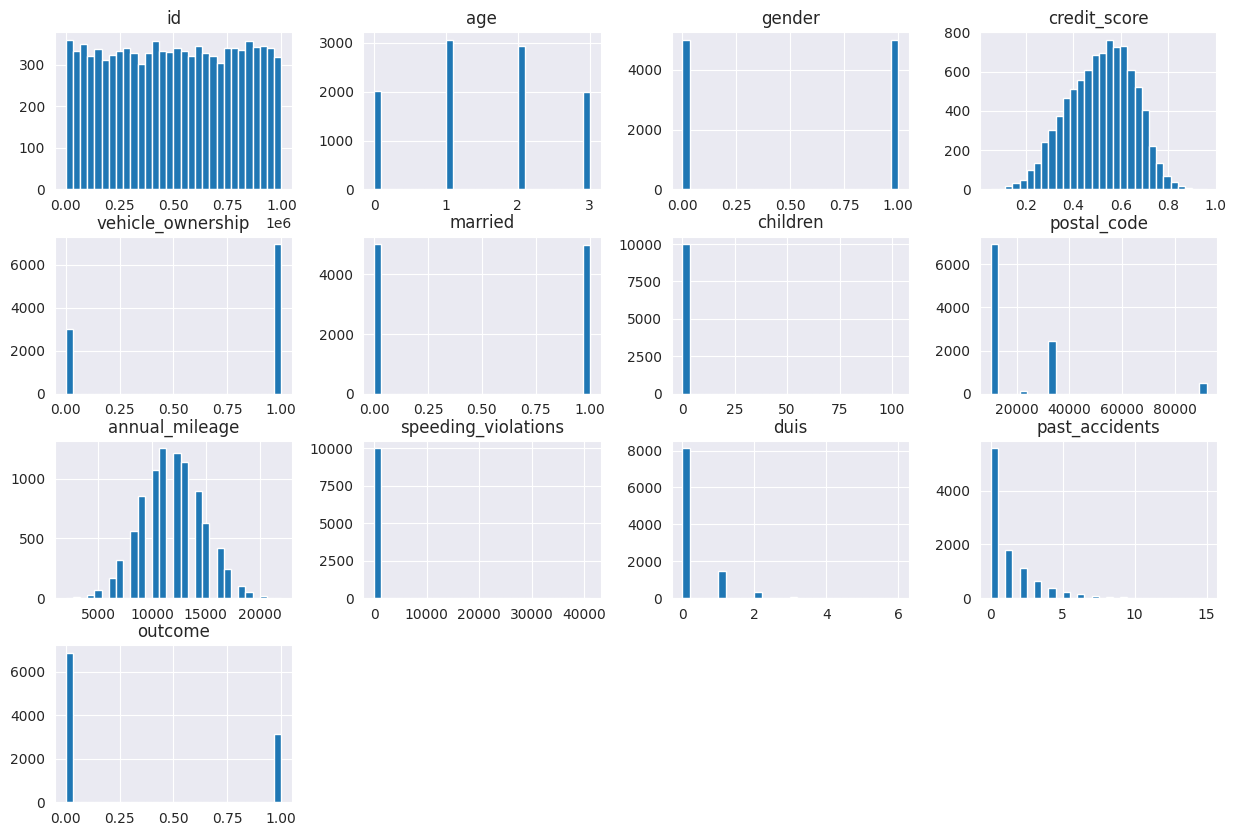

In [24]:
print(df.isna().sum())
df.hist(bins=30, figsize=(15, 10))

# Préparation des données
Pour les données manquantes des colonnes “credit_score” et “annual_mileage” on remplace les valeurs manquantes par la médiane de leur colonne car elles ne représentent pas plus d'un tiers de l'échantillon auquel cas nous les aurions supprimées.

In [25]:
#Traitement des données manquantes
#Attention à run all code à chaque fois sinon ce qu'on souhaite montrer "disparaît"
#Lorsque run cellule par cellule Jupyter garde en mémoire la valeur du dernier run par cellule et non pas celui du dernier run all
print(df.isna().sum())
for col in df:
    if col == 'credit_score' or col == 'annual_mileage':
        df[col] = df[col].fillna(df[col].median())
print(df.isna().sum())

id                       0
age                      0
gender                   0
driving_experience       0
education                0
income                   0
credit_score           982
vehicle_ownership        0
vehicle_year             0
married                  0
children                 0
postal_code              0
annual_mileage         957
vehicle_type             0
speeding_violations      0
duis                     0
past_accidents           0
outcome                  0
dtype: int64
id                     0
age                    0
gender                 0
driving_experience     0
education              0
income                 0
credit_score           0
vehicle_ownership      0
vehicle_year           0
married                0
children               0
postal_code            0
annual_mileage         0
vehicle_type           0
speeding_violations    0
duis                   0
past_accidents         0
outcome                0
dtype: int64


Même chose pour les données aberrantes: remplacement par la valeur de la médiane

array([[<Axes: title={'center': 'children'}>,
        <Axes: title={'center': 'speeding_violations'}>]], dtype=object)

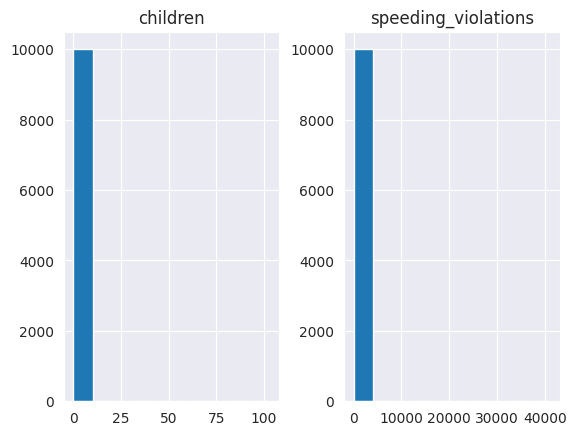

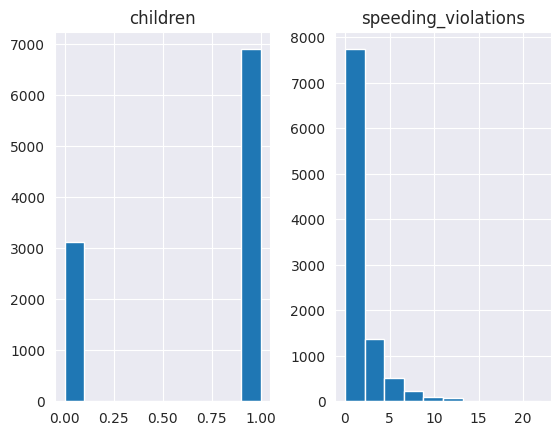

In [26]:
#Traitement des données aberrantes
df.hist(column=['children','speeding_violations'])
df.loc[df.children > 20, 'children'] = df['children'].median()
df.loc[df.speeding_violations > 30, 'speeding_violations'] = df['speeding_violations'].median()
df.hist(column=['children','speeding_violations'])

Suppression des colonnes qui ne sont pas intéressantes pour la résolution du problème de classification.
Nous supprimerons la colonne "id" qui n'est pas pertinente pour notre classification

In [27]:
df = df.drop(columns=['id'])

Pour la transformation des variables qualitatives en variables numériques:
- driving_experience: 0: entre 0 et 9 ans d'expérience, 1: entre 10 et 19 ans d'expérience, 2: entre 20 et 29 ans d'expérience, 3: plus de 30 ans d'expérience
- education: 0: aucune, 1: lycée, 2: université
- income: 0: pauvreté, 1: classe ouvrière, 2: classe moyenne, 3: classe supérieure
- vehicle_year: 0: avant 2015, 1: après 2015
- vehicle_type: 0: sedan, 1: voiture de sport

In [28]:
print("Avant transformation:")
print(df.driving_experience.unique())
print(df.education.unique())
print(df.income.unique())
print(df.vehicle_year.unique())
print(df.vehicle_type.unique())

label_encoder = LabelEncoder()

print("\nAprès transformation:")
#driving_experience
label_encoder.fit(df['driving_experience'])
df['driving_experience'] = label_encoder.transform(df['driving_experience'])
print(df.driving_experience.unique())

#education
label_encoder.fit(df['education'])
df['education'] = label_encoder.transform(df['education'])
print(df.education.unique())

#income
label_encoder.fit(df['income'])
df['income'] = label_encoder.transform(df['income'])
print(df.income.unique())

#vehicle_year
label_encoder.fit(df['vehicle_year'])
df['vehicle_year'] = label_encoder.transform(df['vehicle_year'])
print(df.vehicle_year.unique())

#vehicle_type
label_encoder.fit(df['vehicle_type'])
df['vehicle_type'] = label_encoder.transform(df['vehicle_type'])
print(df.vehicle_type.unique())

Avant transformation:
['0-9y' '10-19y' '20-29y' '30y+']
['high school' 'none' 'university']
['upper class' 'poverty' 'working class' 'middle class']
['after 2015' 'before 2015']
['sedan' 'sports car']

Après transformation:
[0 1 2 3]
[0 1 2]
[2 1 3 0]
[0 1]
[0 1]


Il nous reste à normaliser les données d'entrée. Nous utiliserons pour cela la classe StandardScaler:

In [29]:
# Exclusion de la variable de sortie
df_sans_outcome = [col for col in df.columns if col != 'outcome']
# Instantiation d'un StandardScaler
tab_numpy = df[df_sans_outcome].values
scaler = StandardScaler()
# Input des données au scaler
scaler.fit(tab_numpy)
# Normalisation
donnees_normalisees = scaler.transform(tab_numpy)
print(np.mean(donnees_normalisees, axis=0))
print(np.std(donnees_normalisees, axis=0))
# Re-transformation en dataframe et rajout de la colonne de la variable de sortie
df_normalise = pd.DataFrame(donnees_normalisees, columns=df_sans_outcome)
df = df_normalise.assign(outcome=df['outcome'])

[-4.74287276e-17 -6.39488462e-18  6.39488462e-17  1.13686838e-17
 -1.66977543e-17 -2.89190893e-16  1.26121336e-16 -1.35003120e-17
  4.68958206e-17  5.45341550e-17  3.41060513e-17 -1.06581410e-17
 -1.56319402e-17 -4.01456646e-17  9.69890834e-17 -1.77635684e-18]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


Les moyennes proches de 0 et les variances proches de 1 attestent de la normalisation de nos données d'entrée.

# Recherche de corrélations
Intéressons-nous maintenant aux corrélations existantes dans notre jeu de données


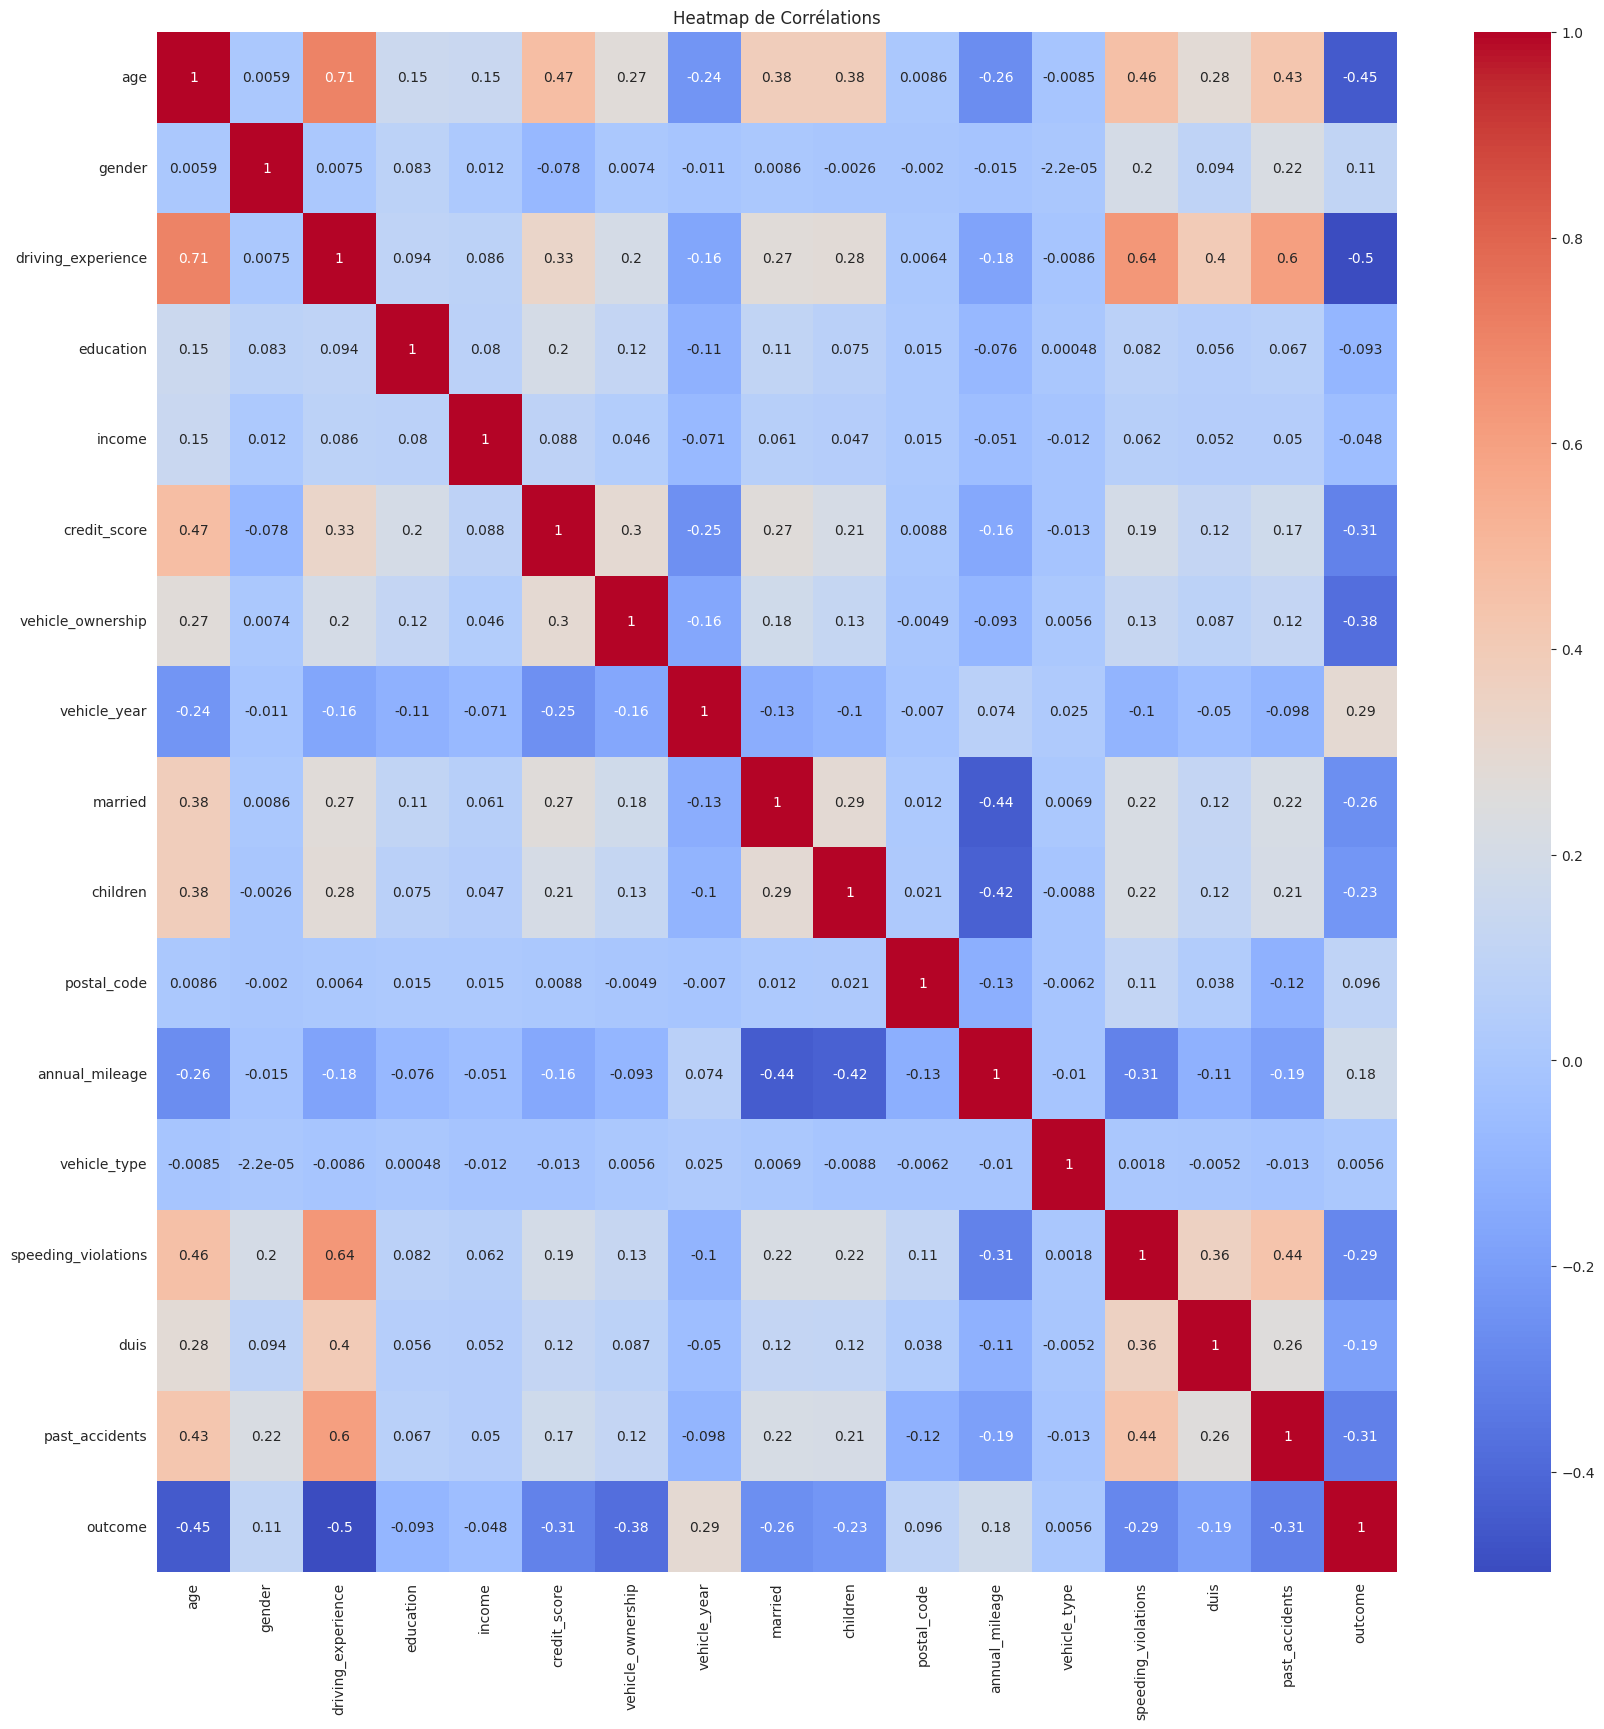

In [30]:
correlations = df.corr()

fig, ax = plt.subplots(figsize=(20, 20))
# Créer la heatmap
sns.heatmap(correlations, annot=True, cmap='coolwarm')

# Ajouter le titre
plt.title('Heatmap de Corrélations')


# Afficher la heatmap
plt.show()

Le coefficient de corrélation indique comment deux variables évoluent linéairement l'une par rapport à l'autre. Plus la valeur absolue du coefficient de corrélation est proche de 1, plus la relation linéaire entre les variables est forte. Tandis qu'un coefficient de corrélation proche de zéro indique une faible corrélation linéaire. Le coefficient est négatif si lorsqu'une variable augmente l'autre diminue et il est positif dans le cas inverse.

# Extraction des jeux d'apprentissage et de test

In [31]:
x = df.drop('outcome', axis=1)
y = df['outcome']


x_training, x_testing,y_training, y_testing = train_test_split(x, y, random_state=1)


Dans cette partie nous créons les jeux d'apprentissage et de test à l'aide de la fonction train_test_split() de Scikit-Learn. Il est possible de paramétrer le pourcentage des données attribuées au jeu de test et d'apprentissage toutefois nous laissons ici les valeurs par défaut (75% des données pour l'apprentissage et 25% pour les tests).
Notre jeu d'apprentissage est composé des variables x_training et y_training tandis que notre jeu de test est composé des variables x_testing et y_testing avec x correspondants aux variables d'entrée et y aux variables de sorties.

# Entraînement d'un modèle


In [32]:
model = LogisticRegression()
model.fit(x_training, y_training)

LogisticRegression()

Concernant cet algorithme, on fait l'hypothèse que le logarithme du rapport des vraisemblances (fonction logit) est une combinaison linéaire des variables d'entrée. Les n variables sont pondérées par un poids attribué à chacune des variables. Ce sont les coefficients de régression.
Afin de maximiser la log-vraisemblance il faut minimiser la fonction de coût (log-loss) qui mesure l'écart entre les prédictions du modèle et les valeurs réelles. On réalise pour cela une descente de gradient en mettant à jour de façon itérative les paramètres Omega et Omega0 de la fonction log-loss lors de la phase d'apprentissage.

# Evaluation du modèle


In [33]:
predictions = model.predict(x_testing)
print(predictions)

for i in range(len(x_testing)):
    print("Échantillon", i+1)
    print("Classe prédite :", predictions[i])
    print("Classe réelle :", y_testing.iloc[i])

accuracy = accuracy_score(y_testing, predictions)
print("accuracy = " + accuracy.__str__())
confusion_mat = confusion_matrix(y_testing, predictions)
print("confusion_map = " + confusion_mat.__str__())
precision = precision_score(y_testing, predictions)
print("precision = " + precision.__str__())
recall = recall_score(y_testing, predictions)
print("recall = " + recall.__str__())
f1 = f1_score(y_testing, predictions)
print("f1 = " + f1.__str__())

[0. 1. 0. ... 0. 0. 0.]
Échantillon 1
Classe prédite : 0.0
Classe réelle : 0.0
Échantillon 2
Classe prédite : 1.0
Classe réelle : 1.0
Échantillon 3
Classe prédite : 0.0
Classe réelle : 0.0
Échantillon 4
Classe prédite : 1.0
Classe réelle : 0.0
Échantillon 5
Classe prédite : 0.0
Classe réelle : 0.0
Échantillon 6
Classe prédite : 0.0
Classe réelle : 1.0
Échantillon 7
Classe prédite : 0.0
Classe réelle : 0.0
Échantillon 8
Classe prédite : 1.0
Classe réelle : 0.0
Échantillon 9
Classe prédite : 1.0
Classe réelle : 1.0
Échantillon 10
Classe prédite : 1.0
Classe réelle : 1.0
Échantillon 11
Classe prédite : 0.0
Classe réelle : 0.0
Échantillon 12
Classe prédite : 1.0
Classe réelle : 1.0
Échantillon 13
Classe prédite : 0.0
Classe réelle : 0.0
Échantillon 14
Classe prédite : 0.0
Classe réelle : 0.0
Échantillon 15
Classe prédite : 0.0
Classe réelle : 0.0
Échantillon 16
Classe prédite : 0.0
Classe réelle : 0.0
Échantillon 17
Classe prédite : 0.0
Classe réelle : 0.0
Échantillon 18
Classe prédite : 0

- L'accuracy score permet de mesurer la précision du modèle en calculant le pourcentage de prédictions correctes parmi l'ensemble des prédictions effectuées. Il a pour avantage d'être général et simple à comprendre et fonctionne bien lorsque les classes du jeu de données ont approximativement le même nombre d'observations (classes équilibrées).
- La matrice de confusion est un tableau ou les lignes correspondent aux classes réelles et les colonnes aux classes prédites par le modèle. La matrice montre le nombre de vrais positifs, de vrais négatifs, de faux positifs et de faux négatifs.
- Le precision score permet de mesurer la précision du modèle en calculant la proportion d'étiquettes prédites comme positives qui sont réellement positives. L'intérêt de la mesure par rapport à l'accuracy score est une moins grande sensibilité aux faux positifs et est plus performant pour des classes déséquilibrées.
- Le recall mesure la proportion d'exemples positifs réels qui ont été correctement identifiés par le modèle parmi tous les exemples positifs présents dans le jeu de données
- Le f1 score est une mesure calculée à partir du recall et de la précision afin de fournir une mesure globale de la performance du modèle en tenant compte à la fois des faux positifs et des faux négatifs. C'est la moyenne harmonique de la précision et du recall.

# Amélioration de l'évaluation

In [ ]:
kfold = KFold(n_splits=5)

cross_val_result = cross_val_score(model, x_testing, y_testing, cv=kfold)

print(accuracy)
print(cross_val_result.mean())

On réalise la méthode de validation croisée avec la fonction cross_val_score. Elle permet de re-séparer les données en un nombre de plis, de les entraîner et de les tester.
Ici .mean() sert à faire la moyenne de l'accuracy de tous les plis. Par rapport à l'accuracy de base le résultat reste très similaire bien que légèrement meilleur.
Pour un meilleur résultat il faut choisir un nombre de plis qui ne soit ni trop grand, ni trop petit. Ceci permet de comparer plusieurs modèles mais aussi une réduction de la variance de l'estimation de la performance du modèle.

# Comparaison avec d'autres algorithmes